# Memuat Pustaka Dasar

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
from PIL import Image
np.random.seed(21)

# Menentukan Direktori Data

In [2]:
dir_jahe_train = "../input/tanaman-umbi/umbi/train/jahe"
dir_kencur_train = "../input/tanaman-umbi/umbi/train/kencur"
dir_kunci_train = "../input/tanaman-umbi/umbi/train/kunci"
dir_kunyit_train = "../input/tanaman-umbi/umbi/train/kunyit"
dir_laos_train = "../input/tanaman-umbi/umbi/train/laos"

dir_jahe_test = "../input/tanaman-umbi/umbi/tests/jahe"
dir_kencur_test = "../input/tanaman-umbi/umbi/tests/kencur"
dir_kunci_test = "../input/tanaman-umbi/umbi/tests/kunci"
dir_kunyit_test = "../input/tanaman-umbi/umbi/tests/kunyit"
dir_laos_test = "../input/tanaman-umbi/umbi/tests/laos"

read = lambda imname: np.asarray(Image.open(imname).convert("RGB"))

# Memuat Citra Latih

In [3]:
img_jahe = [read(os.path.join(dir_jahe_train, filename)) for filename in os.listdir(dir_jahe_train)]
X_jahe_train = np.array(img_jahe, dtype='uint8')

img_kencur = [read(os.path.join(dir_kencur_train, filename)) for filename in os.listdir(dir_kencur_train)]
X_kencur_train = np.array(img_kencur, dtype='uint8')

img_kunci = [read(os.path.join(dir_kunci_train, filename)) for filename in os.listdir(dir_kunci_train)]
X_kunci_train = np.array(img_kunci, dtype='uint8')

img_kunyit = [read(os.path.join(dir_kunyit_train, filename)) for filename in os.listdir(dir_kunyit_train)]
X_kunyit_train = np.array(img_kunyit, dtype='uint8')

img_laos = [read(os.path.join(dir_laos_train, filename)) for filename in os.listdir(dir_laos_train)]
X_laos_train = np.array(img_laos, dtype='uint8')

# Memuat Citra Tes

In [4]:
img_jahe = [read(os.path.join(dir_jahe_test, filename)) for filename in os.listdir(dir_jahe_test)]
X_jahe_test = np.array(img_jahe, dtype='uint8')

img_kencur = [read(os.path.join(dir_kencur_test, filename)) for filename in os.listdir(dir_kencur_test)]
X_kencur_test = np.array(img_kencur, dtype='uint8')

img_kunci = [read(os.path.join(dir_kunci_test, filename)) for filename in os.listdir(dir_kunci_test)]
X_kunci_test = np.array(img_kunci, dtype='uint8')

img_kunyit = [read(os.path.join(dir_kunyit_test, filename)) for filename in os.listdir(dir_kunyit_test)]
X_kunyit_test = np.array(img_kunyit, dtype='uint8')

img_laos = [read(os.path.join(dir_laos_test, filename)) for filename in os.listdir(dir_laos_test)]
X_laos_test = np.array(img_laos, dtype='uint8')

# Membuat Label

In [5]:
y_jahe_train = np.zeros(X_jahe_train.shape[0]) 
y_kencur_train = np.zeros(X_kencur_train.shape[0]) + 1
y_kunci_train = np.zeros(X_kunci_train.shape[0]) + 2
y_kunyit_train = np.zeros(X_kunyit_train.shape[0]) + 3
y_laos_train = np.zeros(X_laos_train.shape[0]) + 4

In [6]:
y_jahe_test = np.zeros(X_jahe_test.shape[0]) 
y_kencur_test = np.zeros(X_kencur_test.shape[0]) + 1
y_kunci_test = np.zeros(X_kunci_test.shape[0]) + 2
y_kunyit_test = np.zeros(X_kunyit_test.shape[0]) + 3
y_laos_test = np.zeros(X_laos_test.shape[0]) + 4

# Menggabungkan Data

In [7]:
X_train = np.concatenate((X_jahe_train, X_kencur_train, X_kunci_train, X_kunyit_train, X_laos_train), axis = 0)
y_train = np.concatenate((y_jahe_train, y_kencur_train, y_kunci_train, y_kunyit_train, y_laos_train), axis = 0)

X_test = np.concatenate((X_jahe_test, X_kencur_test, X_kunci_test, X_kunyit_test, X_laos_test), axis = 0)
y_test = np.concatenate((y_jahe_test, y_kencur_test, y_kunci_test, y_kunyit_test, y_laos_test), axis = 0)

# Mengacak Urutan Data

In [8]:
s = np.arange(X_train.shape[0])
np.random.shuffle(s)
X_train = X_train[s]
y_train = y_train[s]

s = np.arange(X_test.shape[0])
np.random.shuffle(s)
X_test = X_test[s]
y_test = y_test[s]

# Menampilkan 15 Citra Pertama

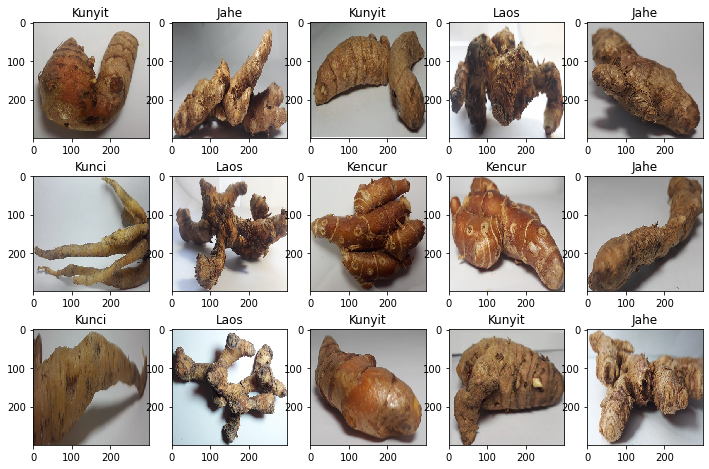

In [9]:
w=40
h=30
fig=plt.figure(figsize=(12, 8))
columns = 5
rows = 3

for i in range(1, columns*rows +1):
  ax = fig.add_subplot(rows, columns, i)
  if y_train[i] == 0:
    ax.title.set_text('Jahe')
  elif y_train[i] == 1:
    ax.title.set_text('Kencur')    
  elif y_train[i] == 2:
    ax.title.set_text('Kunci')
  elif y_train[i] == 3:
    ax.title.set_text('Kunyit')        
  else:
    ax.title.set_text('Laos')

  plt.imshow(X_train[i], interpolation='nearest')
plt.show()

# Mengkodekan Label

In [10]:
import keras
from keras.utils.np_utils import to_categorical 

y_train = to_categorical(y_train, num_classes=5)
y_test = to_categorical(y_test, num_classes=5)

# Normalisasi Data

In [11]:
X_train = X_train/255
X_test = X_test/255

# Membuat Model CNN Sederhana

In [12]:
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam, RMSprop
from keras.callbacks import ReduceLROnPlateau

def CNN_Model(input_shape = (300, 300, 3), num_classes=5):
    
    model = Sequential()
    model.add(Conv2D(64, kernel_size=(3,3), padding='Same', input_shape = input_shape, activation='relu', kernel_initializer = 'glorot_uniform'))
    model.add(Dropout(0.25)) 
        
    model.add(MaxPool2D(pool_size=(2,2)))      
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='normal'))
    
    model.add(Dense(num_classes, activation = 'softmax'))
    
    model.summary()
    
    optimizer= Adam(learning_rate=0.001)     
    model.compile(optimizer = optimizer, loss='categorical_crossentropy', metrics=["accuracy"])
    
    return model   

model = CNN_Model()


User settings:

   KMP_AFFINITY=granularity=fine,verbose,compact,1,0
   KMP_BLOCKTIME=0
   KMP_SETTINGS=1
   KMP_WARNINGS=0

Effective settings:

   KMP_ABORT_DELAY=0
   KMP_ADAPTIVE_LOCK_PROPS='1,1024'
   KMP_ALIGN_ALLOC=64
   KMP_ALL_THREADPRIVATE=128
   KMP_ATOMIC_MODE=2
   KMP_BLOCKTIME=0
   KMP_CPUINFO_FILE: value is not defined
   KMP_DETERMINISTIC_REDUCTION=false
   KMP_DEVICE_THREAD_LIMIT=2147483647
   KMP_DISP_NUM_BUFFERS=7
   KMP_DUPLICATE_LIB_OK=false
   KMP_ENABLE_TASK_THROTTLING=true
   KMP_FORCE_REDUCTION: value is not defined
   KMP_FOREIGN_THREADS_THREADPRIVATE=true
   KMP_FORKJOIN_BARRIER='2,2'
   KMP_FORKJOIN_BARRIER_PATTERN='hyper,hyper'
   KMP_GTID_MODE=3
   KMP_HANDLE_SIGNALS=false
   KMP_HOT_TEAMS_MAX_LEVEL=1
   KMP_HOT_TEAMS_MODE=0
   KMP_INIT_AT_FORK=true
   KMP_LIBRARY=throughput
   KMP_LOCK_KIND=queuing
   KMP_MALLOC_POOL_INCR=1M
   KMP_NUM_LOCKS_IN_BLOCK=1
   KMP_PLAIN_BARRIER='2,2'
   KMP_PLAIN_BARRIER_PATTERN='hyper,hyper'
   KMP_REDUCTION_BARRIER='1,1'
  

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 300, 300, 64)      1792      
_________________________________________________________________
dropout (Dropout)            (None, 300, 300, 64)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 150, 150, 64)      0         
_________________________________________________________________
flatten (Flatten)            (None, 1440000)           0         
_________________________________________________________________
dense (Dense)                (None, 128)               184320128 
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 645       
Total params: 184,322,565
Trainable params: 184,322,565
Non-trainable params: 0
__________________________________________

# Melatih Model

In [13]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [14]:
history = model.fit(X_train, 
                    y_train, 
                    validation_split=0.2, 
                    epochs=50, callbacks=[learning_rate_reduction],
                    verbose=1)

2021-10-16 03:20:04.285618: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/50
12/12 [==============================] - 29s 2s/step - loss: 101.6749 - accuracy: 0.2056 - val_loss: 10.1858 - val_accuracy: 0.1778
Epoch 2/50
12/12 [==============================] - 26s 2s/step - loss: 5.9951 - accuracy: 0.2278 - val_loss: 1.6594 - val_accuracy: 0.2333
Epoch 3/50
12/12 [==============================] - 26s 2s/step - loss: 1.3264 - accuracy: 0.4333 - val_loss: 1.3650 - val_accuracy: 0.4000
Epoch 4/50
12/12 [==============================] - 26s 2s/step - loss: 0.8520 - accuracy: 0.7500 - val_loss: 1.5136 - val_accuracy: 0.3111
Epoch 5/50
12/12 [==============================] - 25s 2s/step - loss: 0.4773 - accuracy: 0.8639 - val_loss: 1.0199 - val_accuracy: 0.6000
Epoch 6/50
12/12 [==============================] - 25s 2s/step - loss: 0.1737 - accuracy: 0.9667 - val_loss: 0.6135 - val_accuracy: 0.7444
Epoch 7/50
12/12 [==============================] - 25s 2s/step - loss: 0.0878 - accuracy: 0.9944 - val_loss: 0.6903 - val_accuracy: 0.6889
Epoch 8/50
12/12 

# Akurasi Model

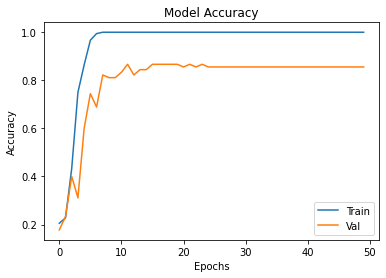

In [15]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')

plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

# Loss Model

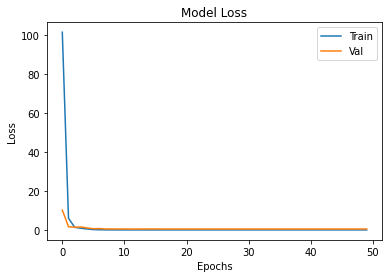

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')

plt.legend(['Train', 'Val'], loc='upper right')
plt.show()